**Build a CNN Based Classifier for Classifying the handwritten digits.**

**Requirements:**
*   Five Number of Convolutional 2D Layers starting with 1024 filters.
*   Kernel size 3 x 3
*   Two Average Pooling Layers, Each after two Convolutional 2D layers.
*   Stride 1
*   Padding ‘valid’
*   Optimizer Adam
*   Loss function catagorical_crossentropy


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


In [4]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(28, 28, 1)))

# Second convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='valid'))

# First Average pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

# Third convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='valid'))

# Fourth  convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))

# Average pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

# Fifth  convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid'))

# Flatten the output layer
model.add(Flatten())

# Dense layer for classification
model.add(Dense(units=10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 130s 70ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0452 - val_accuracy: 0.9889
Epoch 2/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0425 - val_accuracy: 0.9908
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0394 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0454 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0492 - val_accuracy: 0.9901


In [22]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.0492 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


In [9]:
# Save the model (optional)
#model.save('mnist_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# Get predictions
predictions = model.predict(x_test)

313/313 [==============================] - 6s 18ms/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [25]:
# Generate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 973    0    2    0    0    0    0    1    2    2]
 [   1 1128    0    1    0    1    2    2    0    0]
 [   0    4 1021    0    0    0    1    6    0    0]
 [   0    1    0 1006    0    2    0    0    0    1]
 [   0    0    2    0  966    0    4    2    3    5]
 [   0    0    1    4    0  884    1    1    1    0]
 [   1    5    0    0    2    4  945    0    1    0]
 [   0    1    1    0    2    1    0 1023    0    0]
 [   1    0    2    1    0    1    0    0  968    1]
 [   0    0    0    0    9    5    0    4    4  987]]


In [26]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



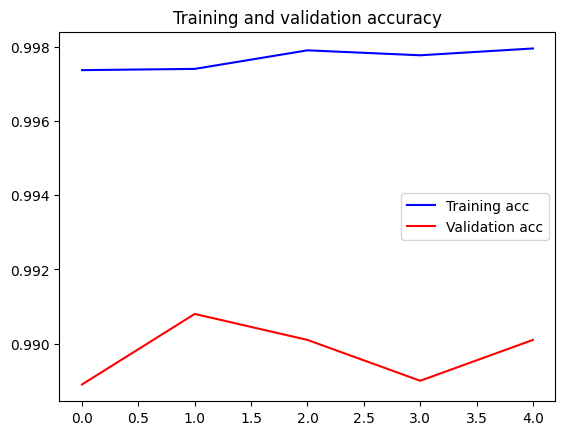

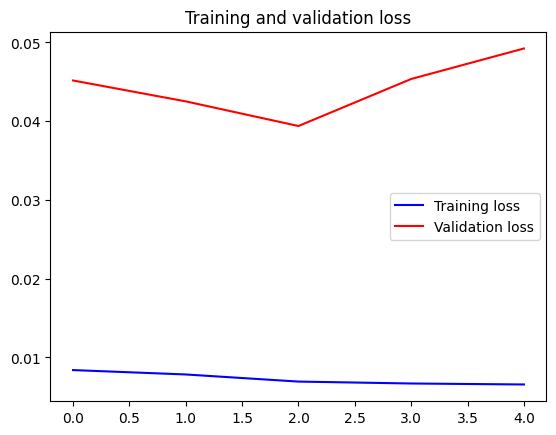

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()